## Importing all the depedencies 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns


## Accessing data

In [5]:
data = pd.read_csv("dataset_Uber.csv")

## first five rows of data

In [6]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Information of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
data.shape

(1156, 7)

## Checking if data contains any null value

In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

## Dropping null values

In [11]:
drp = data.dropna()
drp.isnull().values.any()

False

In [12]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [13]:
drp.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


## Count unique values in the 'START*' column

In [14]:
start_counts = data['START*'].value_counts()
print("Number of unique start locations:", len(start_counts))

Number of unique start locations: 176


## Count unique values in the 'STOP*' column

In [15]:
stop_counts = data['STOP*'].value_counts()
print("Number of unique stop locations:", len(stop_counts))

Number of unique stop locations: 187


## Find the most common start location

In [16]:
most_common_start = start_counts.idxmax()
print("Most common start location:", most_common_start)

Most common start location: Cary


## Find the most common stop location


In [17]:
most_common_stop = stop_counts.idxmax()
print("Most common stop location:", most_common_stop)

Most common stop location: Cary


## Count unique values in the 'PURPOSE*' column


In [18]:
purpose_counts = data['PURPOSE*'].value_counts()
print("Unique purposes:", purpose_counts)

Unique purposes: PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


## Calculate the total miles for each purpose


In [19]:
mileage_by_purpose = data.groupby('PURPOSE*')['MILES*'].sum()
print("Total miles by purpose:")
print(mileage_by_purpose)

Total miles by purpose:
PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64


## Plot a bar chart of mileage by purpose


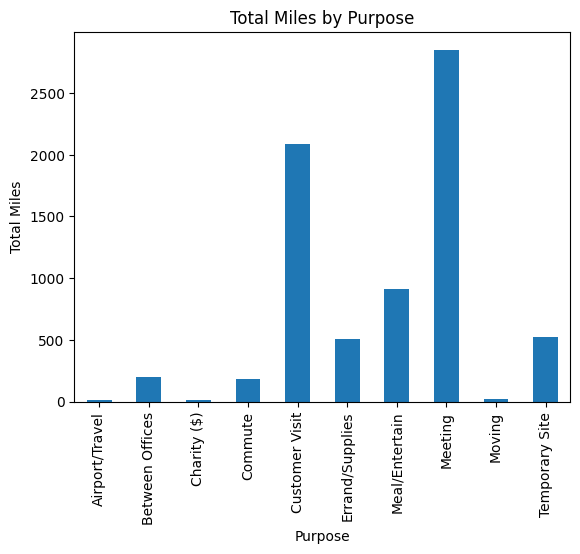

In [20]:
mileage_by_purpose.plot(kind='bar')
plot.xlabel('Purpose')
plot.ylabel('Total Miles')
plot.title('Total Miles by Purpose')
plot.show()

## Count the number of trips in each category


In [21]:
category_counts = data['CATEGORY*'].value_counts()
print("Category counts:")
print(category_counts)

Category counts:
CATEGORY*
Business    1078
Personal      77
Name: count, dtype: int64


## Plot a bar chart of trip category counts


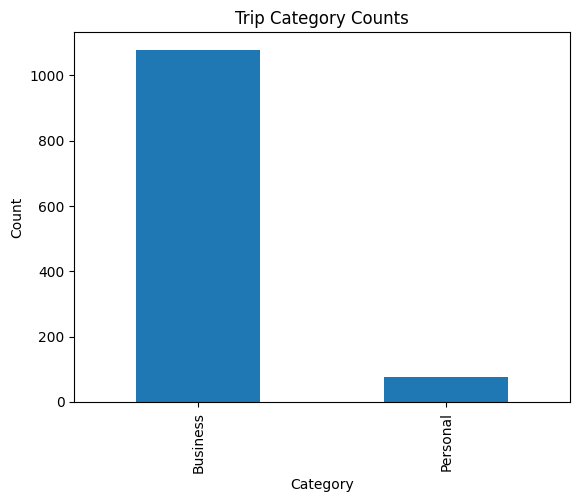

In [22]:
category_counts.plot(kind='bar')
plot.xlabel('Category')
plot.ylabel('Count')
plot.title('Trip Category Counts')
plot.show()

## Calculate the proportions of Business and Personal trips


In [23]:
business_prop = (data['CATEGORY*'] == 'Business').sum() / len(data)
personal_prop = (data['CATEGORY*'] == 'Personal').sum() / len(data)
print("Business Proportion:", business_prop)
print("Personal Proportion:", personal_prop)

Business Proportion: 0.9325259515570934
Personal Proportion: 0.06660899653979238
